# Official Efficiency Plots for 2017 and 2018

Dedicated notebook to produce all efficiency plots (2017 and 2018) to ringer note/paper.

In [1]:
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from EfficiencyTools.analysis.utils import GetHistogramRootPaths, GetHistogramFromMany, GetProfile, PlotProfiles
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle
SetAtlasStyle()
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence

Applying ATLAS style settings...


In [2]:
def Save(hists, keys, paths, output):
    from Gaugi.storage import StoreGate
    store = StoreGate(output)
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = str('/').join(_path.split('/')[0:-1])
        if key in hists.keys():
            store.mkdir(__path)
            store.cd(__path)
            store.addObject(hists[key])
    store.write()
    
def Load(input, keys, paths):
    d = {}
    from Gaugi.storage import StoreGate
    store = StoreGate(input, restoreStoreGate=True)
    dirs = store.getDirs()
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = '/' + _path
        if __path in dirs:
            hist = store.histogram(__path)
            d[key] = hist
    return d

## 1) Read all files:

### 1.1) Create keys and paths

In [3]:
triggers = [
            'HLT_e28_lhtight_nod0_ivarloose',
            'HLT_e28_lhtight_nod0_noringer_ivarloose',
            'HLT_e17_lhvloose_nod0_L1EM15VHI',
            'HLT_e26_lhtight_nod0_ivarloose',
            'HLT_e60_lhmedium_nod0',
            'HLT_e140_lhloose_nod0',
            ]
paths, keys =  GetHistogramRootPaths( triggers, removeInnefBefore=False, is_emulation=False)

Making paths...|############################################################| 6/6
Making paths...... finished task in 0.014610s.


### 1.2) Read 2017 data:

If you ran these cells below and have the root histograms in your workspace, please execute the subsection 1.5. If not, run these cells below and save if with 1.4 cells subsection.

**NOTE**: These steps below take about ~5-10 minutes to read everything from the external hard-driver (castor).

In [5]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM1/before_ts1'
h_data17_before_ts1 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 188/188
Loading...... finished task in 19.126667s.


In [6]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM1/after_ts1'
h_data17_after_ts1 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 1472/1472
Loading...... finished task in 169.741171s.


In [7]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM7/before_ts1/user.*'
h_data17_before_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 172/172
Loading...... finished task in 19.059419s.


In [8]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM7/after_ts1'
h_data17_after_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 1373/1373
Loading...... finished task in 175.953472s.


### 1.3) Read 2018 data:

In [9]:
path = '/Volumes/castor/cern_data/data18_13TeV/Mon/EGAM1_merged/user.*'
h_data18 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 10/10
Loading...... finished task in 105.999983s.


In [10]:
path = '/Volumes/castor/cern_data/data18_13TeV/Mon/EGAM7/user.*'
h_data18_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 513/513
Loading...... finished task in 59.850711s.


### 1.4) Save histograms:

In [11]:
Save(h_data17_after_ts1       ,  keys, paths, 'hists_data17_EGAM1_after_ts1.root')
Save(h_data17_before_ts1      ,  keys, paths, 'hists_data17_EGAM7_before_ts1.root')
Save(h_data17_before_ts1_egam7,  keys, paths, 'hists_data17_EGAM7_before_ts1.root')
Save(h_data17_after_ts1_egam7 ,  keys, paths, 'hists_data17_EGAM7_after_ts1.root')
Save(h_data18                 ,  keys, paths, 'hists_data18_EGAM1.root')
Save(h_data18_egam7           ,  keys, paths, 'hists_data18_EGAM7.root')

### 1.5) Load histograms (optional)

In [166]:
h_data17_before_ts1       = Load('hists_data17_EGAM1_before_ts1.root', keys, paths)
h_data17_after_ts1        = Load('hists_data17_EGAM1_after_ts1.root' , keys, paths)
h_data17_before_ts1_egam7 = Load('hists_data17_EGAM7_before_ts1.root', keys, paths)
h_data17_after_ts1_egam7  = Load('hists_data17_EGAM7_after_ts1.root' , keys, paths)
h_data18                  = Load('hists_data17_EGAM1.root'           , keys, paths)
h_data18_egam7            = Load('hists_data17_EGAM7.root'           , keys, paths)

## 2) Official plots (e28 ringer vs noringer 2017, after TS1):

Compare ringer and noringer (backup triggers) chains.

In [138]:
def AddLegend(canvas, x, y, legends):
    MakeLegend( canvas,x,y,x+0.77,y+0.25,textsize=16, names=legends, option = 'p' )

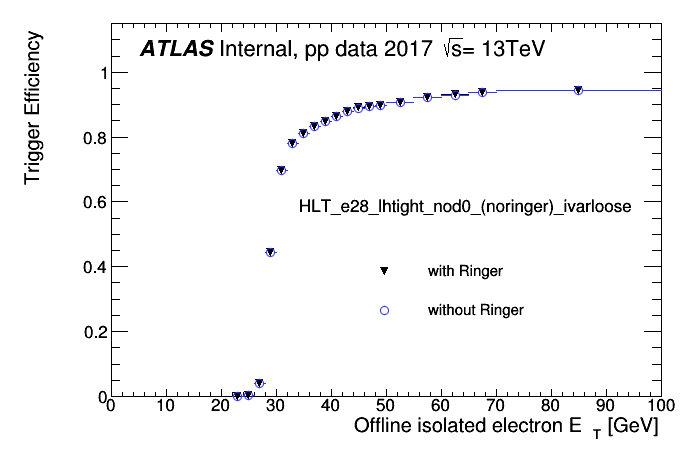

In [402]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.43, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddLegend( canvas,0.49,0.3, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_et.pdf')

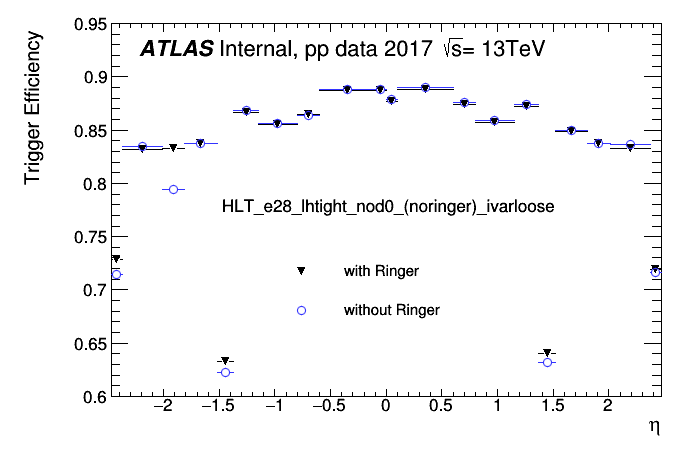

In [400]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.95, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.32, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddLegend( canvas,0.37,0.3, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_eta.pdf')

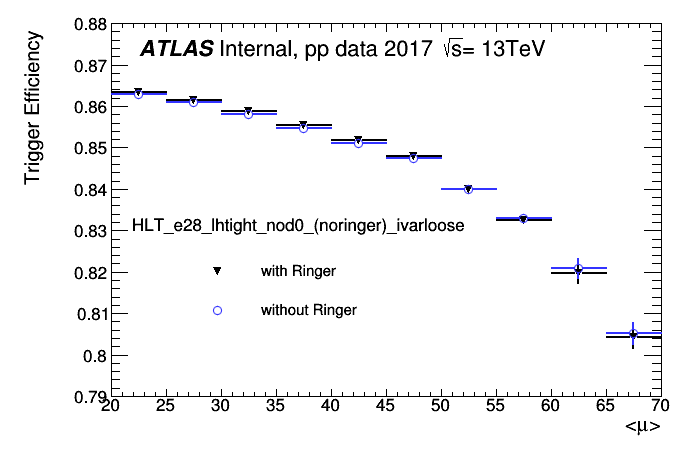

In [395]:
resize =  [10,20,70]
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'], resize),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_mu'],resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.88,y_axes_minimum=0.79)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.19, 0.51, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddLegend( canvas,0.25,0.3, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_mu.pdf')

### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

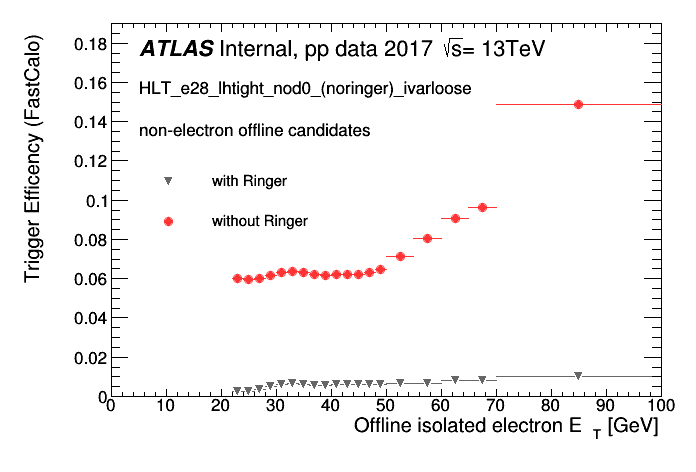

In [371]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_et'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_et']),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_et'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.19, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.18,0.49,['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_et.pdf')

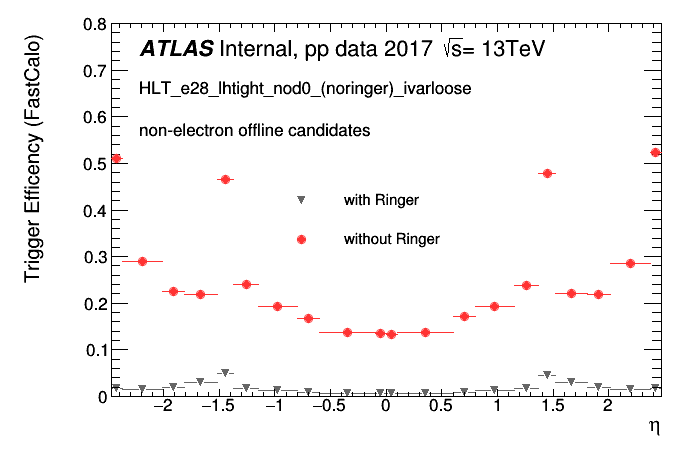

In [372]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_eta = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_eta'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_eta']),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_eta'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.8, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.37,0.45, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_eta.pdf')

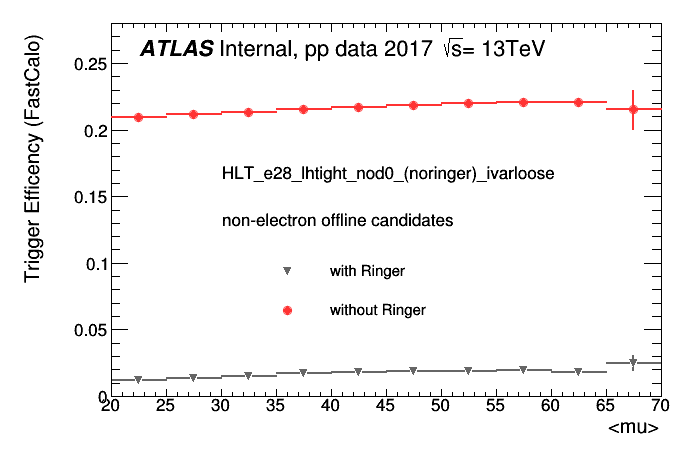

In [373]:
resize =  [10,20,70]
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_mu = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_mu'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_mu'], resize=resize),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_mu'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_mu'],resize=resize),
]
canvas = PlotProfiles( hists_mu, '<mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.28, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.32, 0.62, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.32, 0.52, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.35,0.3, ['with Ringer', 'without Ringer'] )
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_mu.pdf')

### 2.2) Check fake rejection for HLT step:



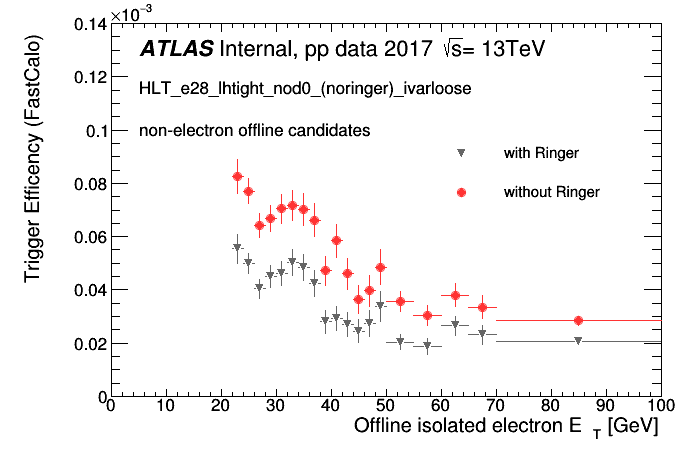

In [374]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_et'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.00014, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.6,0.55, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_et.pdf')

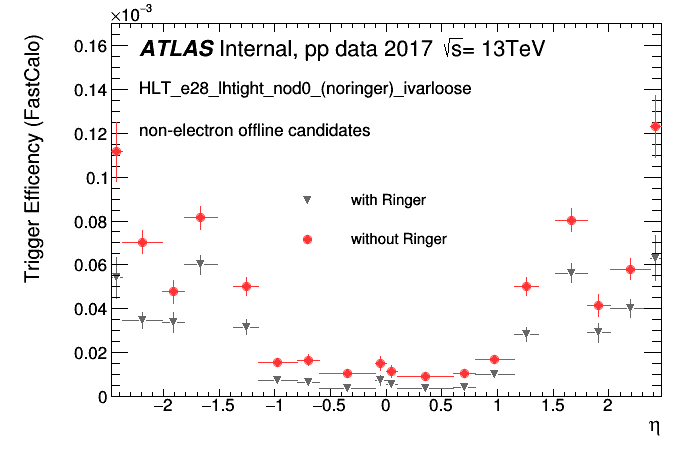

In [375]:
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_eta = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.00017, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.38,0.45, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_eta.pdf')

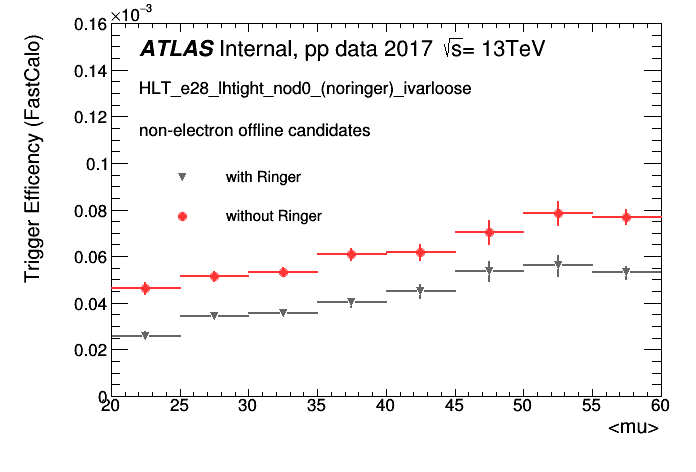

In [376]:
resize =  [8,20,60]
these_colors = [kGray+2,kRed-4]
these_markers = [23, 20]
these_transcolors = []
hists_mu = [
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'], resize=resize),
            GetProfile(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_mu'],resize=resize),
]
canvas = PlotProfiles( hists_mu, '<mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.00016, y_axes_minimum=0.0,
                       ylabel='Trigger Efficency (FastCalo)')
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
AddTexLabel(canvas, 0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
AddLegend( canvas,0.2,0.5, ['with Ringer', 'without Ringer'])
canvas.Draw()
canvas.SaveAs('eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_mu.pdf')

## 3) Official plots (2017 ringer vs noringer before and after TS1)

This section will plot all single triggers before and after ts1.
- oper markers: before TS1 (without ringer);
- close markers: after TS1 (with ringer)


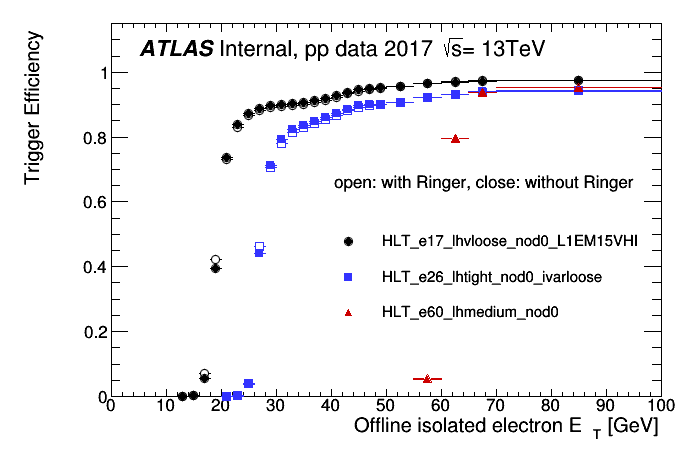

In [377]:
these_colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
these_markers = [20,21,22, 24,25,26]
hists_et = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.48, 0.6, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.45,0.3,.98,0.6,textsize=16, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_et.pdf')

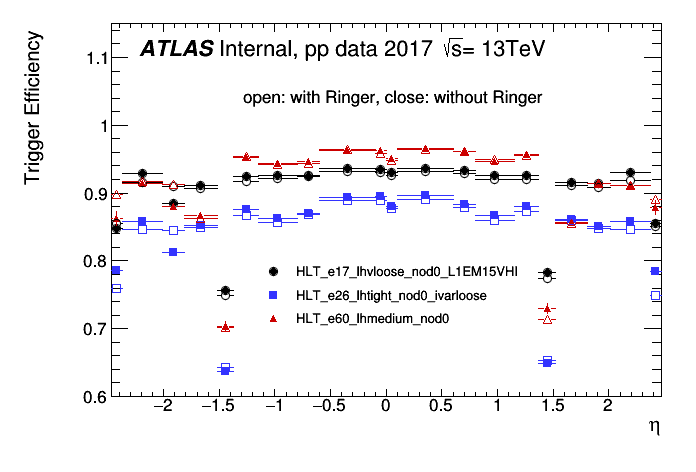

In [378]:
these_colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
these_markers = [20,21,22, 24,25,26]
hists_eta = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.35, 0.78, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.36,0.3,.98,0.5,textsize=14, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_eta.pdf')

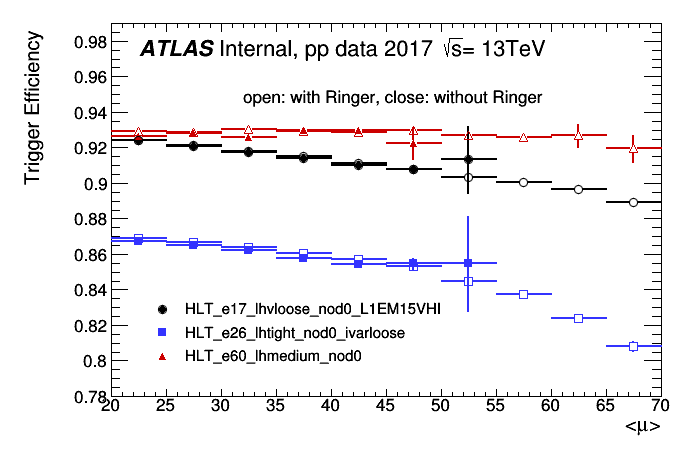

In [379]:
resize =  [10,20,70]
these_colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
these_markers = [20,21,22, 24,25,26]
hists_mu = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],resize),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],resize),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=.99, y_axes_minimum=0.78)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.35, 0.78, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.2,0.22,.98,0.42,textsize=16, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_mu.pdf')

## 4) Official plots (2017 (after TS1) and 2018 ringer vs noringer)

Here we will plot the comparison between ringer (v6), operating in 2017 after TS1, and ringer v8 (2018 tunings)

- 2017 after TS1: ringer v6 tunings;
- 2018: ringer v8 tunings;

### 4.1) HLT_e17_lhvloose_nod0_L1EM15VHI:

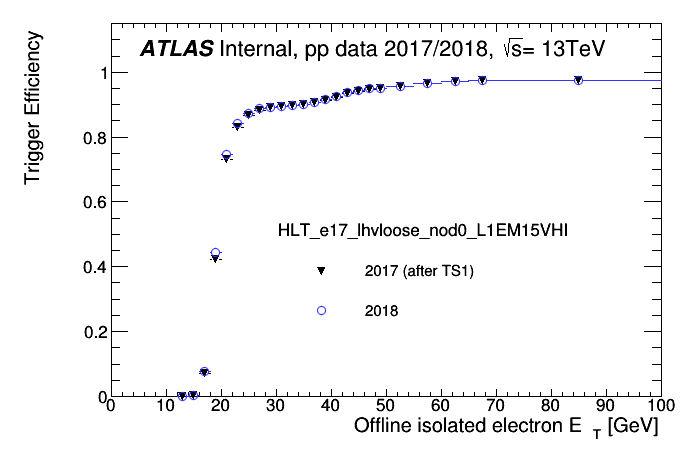

In [380]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []
hists_et = [
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            GetProfile(h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),

]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.4, 0.50, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
AddLegend( canvas,0.4, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_et.pdf')

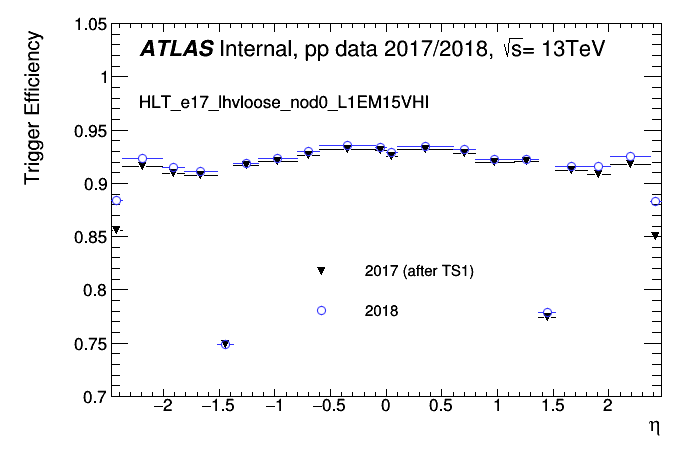

In [381]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]
these_transcolors = []

hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            GetProfile(h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),

]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.05, y_axes_minimum=0.7)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.77, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
AddLegend( canvas,0.4, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_eta.pdf')

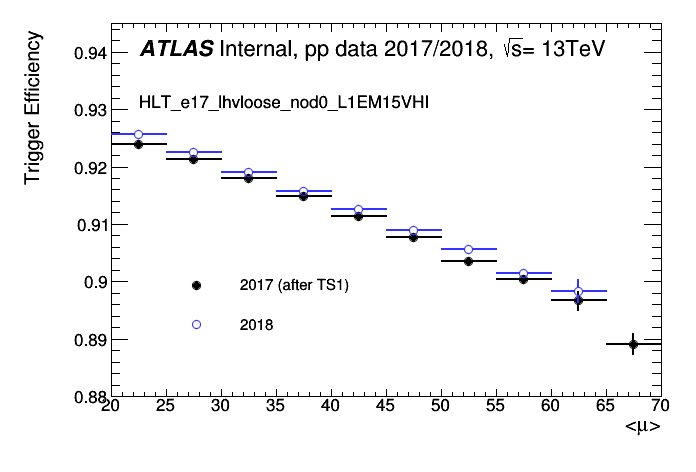

In [382]:
these_colors = [kBlack,kBlue-4]
these_markers = [20,24]
resize = [10,20,70]
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'], resize=resize),
            GetProfile(h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'], resize=resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.945, y_axes_minimum=0.88)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.77, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
AddLegend( canvas,0.22, 0.27, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_mu.pdf')

### 4.2) HLT_e26_lhtight_nod0_ivarloose:

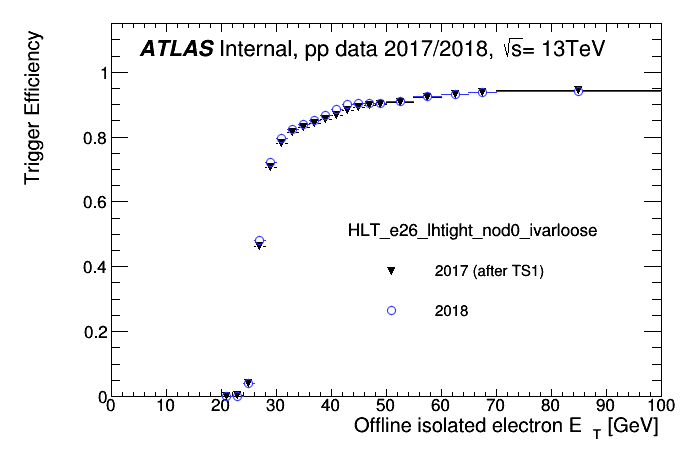

In [383]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]

hists_et = [
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),

]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.5, 0.50, 'HLT_e26_lhtight_nod0_ivarloose', textsize=0.04)
AddLegend( canvas,0.5, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e26_lhtight_nod0_ivarloose_2017_after_ts1_and_2018_et.pdf')

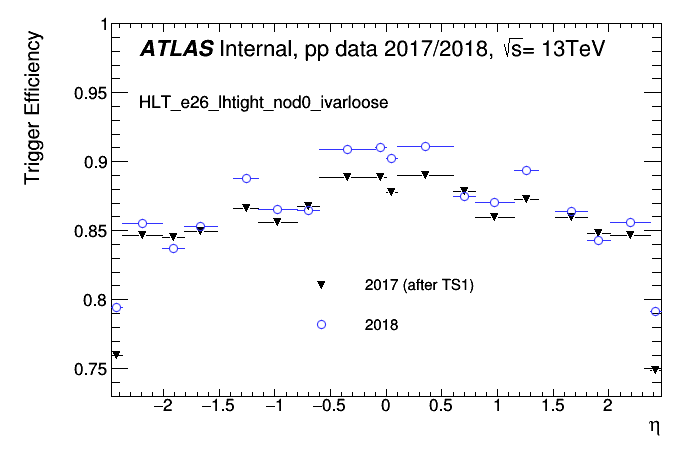

In [384]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]

hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),

]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.0, y_axes_minimum=0.73)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.77, 'HLT_e26_lhtight_nod0_ivarloose', textsize=0.04)
AddLegend( canvas,0.4, 0.27, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e26_lhtight_nod0_ivarloose_2017_after_ts1_and_2018_eta.pdf')

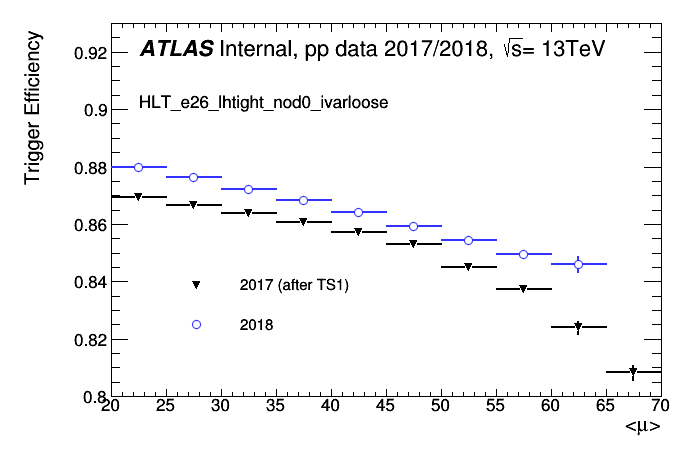

In [385]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]
resize = [10,20,70]
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'], resize=resize),
            GetProfile(h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'], resize=resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.93, y_axes_minimum=0.8)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.2, 0.77, 'HLT_e26_lhtight_nod0_ivarloose', textsize=0.04)
AddLegend( canvas,0.22, 0.27, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e26_lhtight_nod0_ivarloose_2017_after_ts1_and_2018_mu.pdf')

### 4.3) HLT_e60_lhmedium_nod0:

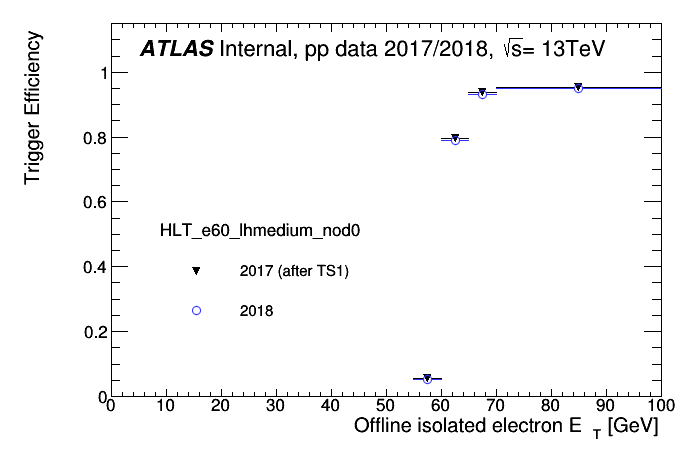

In [386]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]

hists_et = [
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
            GetProfile(h_data18['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data18['HLT_e60_lhmedium_nod0_HLT_et']),

]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.23, 0.50, 'HLT_e60_lhmedium_nod0', textsize=0.04)
AddLegend( canvas,0.22, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e60_lhmedium_nod0_L1EM24VHI_2017_after_ts1_and_2018_et.pdf')

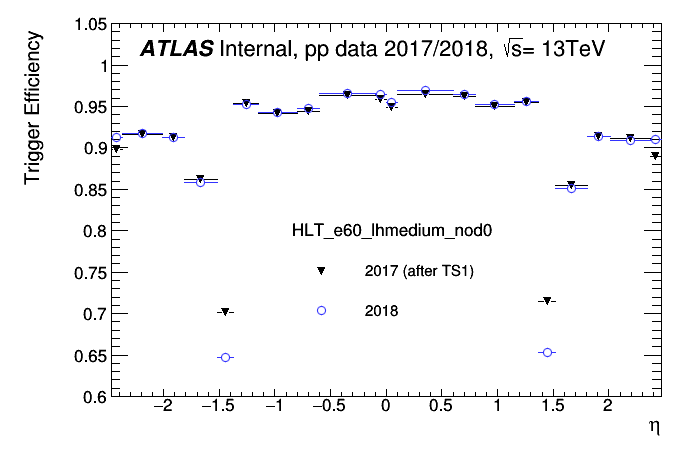

In [387]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]

hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
            GetProfile(h_data18['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data18['HLT_e60_lhmedium_nod0_HLT_eta']),

]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.05, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.42, 0.50, 'HLT_e60_lhmedium_nod0', textsize=0.04)
AddLegend( canvas,0.4, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e60_lhmedium_nod0_L1EM24VHI_2017_after_ts1_and_2018_eta.pdf')

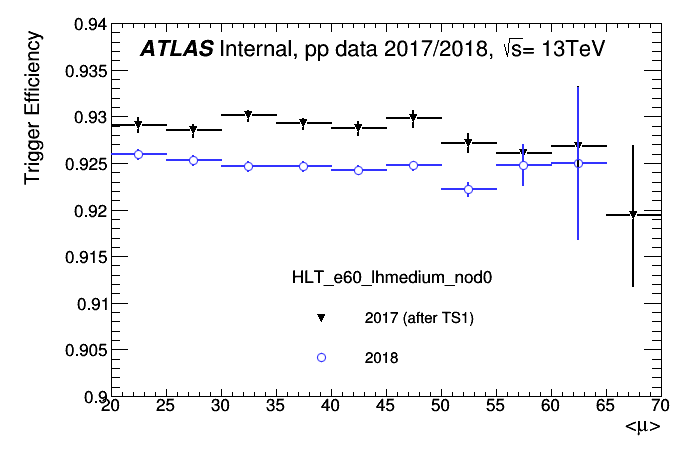

In [388]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]
resize = [10,20,70]
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],resize=resize),
            GetProfile(h_data18['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data18['HLT_e60_lhmedium_nod0_HLT_mu'], resize=resize),

]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.94, y_axes_minimum=0.9)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.42, 0.40, 'HLT_e60_lhmedium_nod0', textsize=0.04)
AddLegend( canvas,0.4, 0.2, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e60_lhmedium_nod0_L1EM24VHI_2017_after_ts1_and_2018_mu.pdf')

### 4.4) HLT_e140_lhloose_nod0:

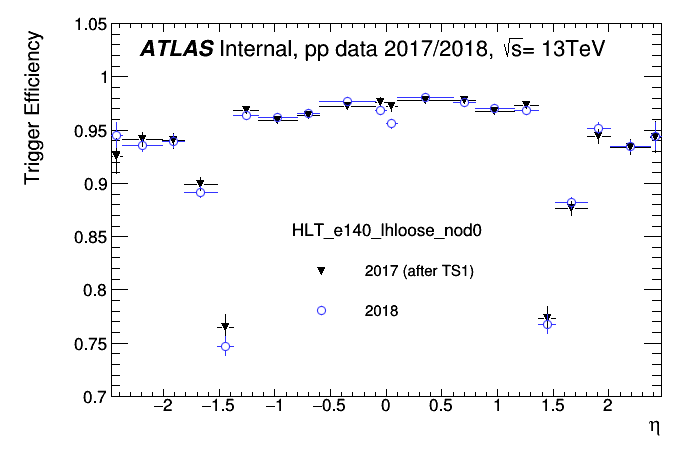

In [389]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]

hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_eta']),
            GetProfile(h_data18['HLT_e140_lhloose_nod0_HLT_match_eta'],
                       h_data18['HLT_e140_lhloose_nod0_HLT_eta']),

]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.05, y_axes_minimum=0.7)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.42, 0.50, 'HLT_e140_lhloose_nod0', textsize=0.04)
AddLegend( canvas,0.4, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e140_lhloose_nod0_L1EM24VHI_2017_after_ts1_and_2018_eta.pdf')

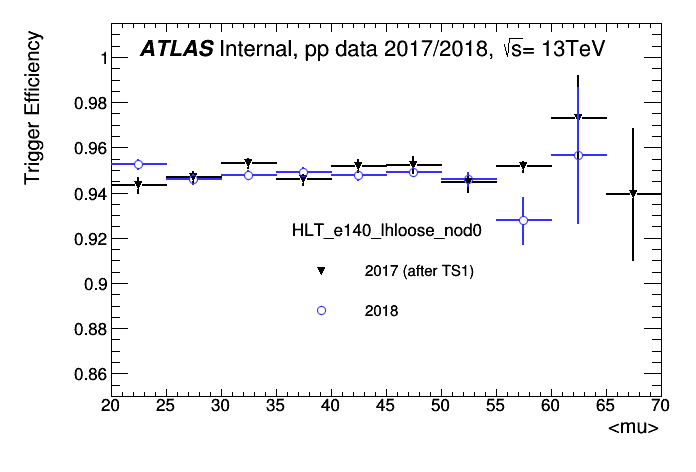

In [390]:
these_colors = [kBlack,kBlue-4]
these_markers = [23,24]
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_mu'],resize=resize),
            GetProfile(h_data18['HLT_e140_lhloose_nod0_HLT_match_mu'],
                       h_data18['HLT_e140_lhloose_nod0_HLT_mu'],resize=resize),

]
canvas = PlotProfiles( hists_mu, '<mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.015, y_axes_minimum=0.85)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.42, 0.50, 'HLT_e140_lhloose_nod0', textsize=0.04)
AddLegend( canvas,0.4, 0.3, ['2017 (after TS1)', '2018'])
canvas.Draw()
canvas.SaveAs('eff_EGAM1_e140_lhloose_nod0_L1EM24VHI_2017_after_ts1_and_2018_mu.pdf')